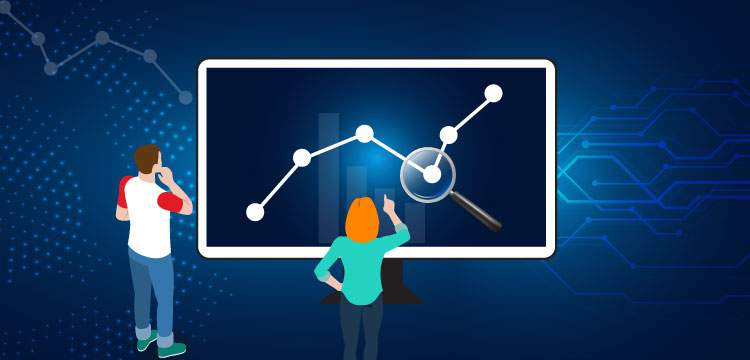
<center><strong><h1>TIME SERIES</h1><p>
    
It is data consisting of observation units ordered by time. It could be weather data, stock market data. In other words, it is the data consisting of observation values ordered according to time.</p></strong></center>

In previous notebook, introduction of Time Series and Smoothing Methods have been explained. In here, the terminology will be explained again, for checking Smoothing Methods Tutorial:

[Time Series Smoothing Methods Tutorial](http://www.kaggle.com/code/furkannakdagg/time-series-smoothing-methods-tutorial)
    


There are 4 structural concepts we need to know:
<h3>1. Stationary</h3>
The statistical properties of the series do not change over time. In other words, if the mean, variance and covariance of a time series remain constant over time, the series is said to be stationary.<br><br>
Suppose we take different periods in a time series. The fact that their properties do not change over time is that they are close to each other since the averages/standard deviations of the periods are taken. We are not interested in small differences, we are interested in statistical differences.
<br><br>

**Why is stationary significant?:**
Theoretically, there is an interpretation that the structure of the time series will be more predictable if it is at a certain stationarity, that is, in a certain pattern. In other words, the next step of a movement that shows a certain structure is also predictable. Therefore, there is usually an expectation: Is the time series stationary? There is an expectation that we can make predictions more easily if it is stationary. Because of this expectation, the first concept we focus on is the concept of stationary. To capture this, we can see this by looking at the time series image instead of statistical tests.

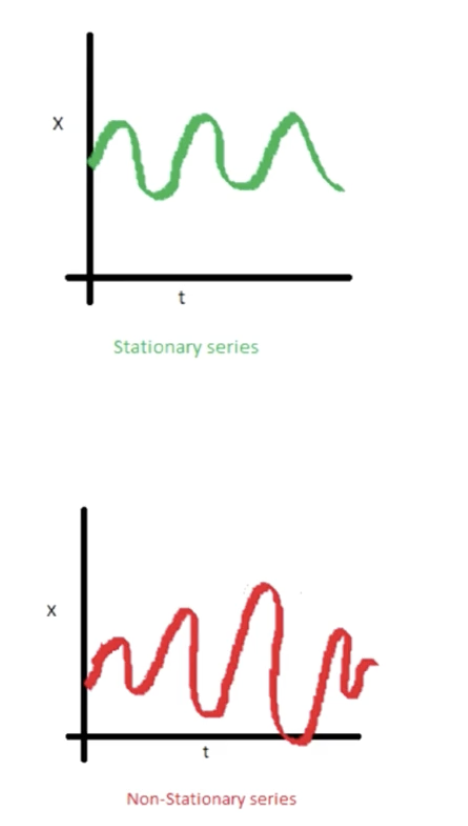

<h3>2. Trend</h3>
It is the structure of the long-term increase or decrease of a time series. If there is a trend, it is very unlikely that the series will be stationary because the statistics of the periods (mean, standard deviation, etc.) will change in an increasing or decreasing trend.

<h3>3. Seasonality</h3> 
Seasonality is when a time series repeats a certain behavior at certain intervals.


<h3>4. Cycle</h3> 
It contains repetitive patterns similar to seasonality and these two issues can be confused with each other. Seasonality can be mapped to specific time periods. It overlaps with structures such as day, week, year, season. For example, markets do more business on weekends or a product gets more attention in winter, etc.
The cyclicity takes place in a longer time, in a more uncertain structure, in a way that does not overlap with structures such as day, week, year, season. It occurs mostly for structural reasons, with cyclical changes. For example, it is shaped by the speeches of some people from the business world and the speeches of politicians. Although this is not completely seasonal, it occurs in a certain period, but the period in which it will occur is not clear.
<br>

---

**Understanding the Nature of Time Series Models:** We have seen the basic structures of time series above. The assumption underlying the time series: The value of the time series in a period t is most affected by its value in the previous time period (t-1). For example, today is Sunday, the value preceding it most explains the value of the time series on Sunday. Based on this assumption, averaging the previous observation units can be an interpretation.
In other words, it is reasonable to carry a seasonality information from the past, it can be concluded that it is reasonable for us to focus on past values.

**Moving Average:** The future value of a time series is the average of its k previous values.
Moving average trading is generally used in practice not for forecasting, but for capturing/observing a trend. However, while deriving features within the scope of machine learning, we are still generating features based on moving averages.

**Weighted Average:** Similar to a moving average. It carries the idea of giving more weight to later observations.

**NOTE: Although the forecast results are better in the moving average, the moving average and weighted average methods cannot catch the trend (the trend in the data in the period I want to forecast, not in the general chart), they are more successful in stationarity.
In this case, it would make more sense to look at the percentages of change between the values and take their average or weighted average by weighting them.**

**We will use more advanced methods for forecasting, not moving average and weighted average.**

---

<center><h2>Statistical Methods</h2></center>
Smoothing methods can also be considered statistically. It was evaluated in this way because it was mostly referred to as smoothing methods.

<h3>1. AR(p) - Autoregression</h3>
A time series is estimated with the delays before it. Difference from smoothing methods: they are in linear form, so here is a coefficient a in a regression form. p => get delay, AR(2) means take 2 delays. The delays are the previous values of these observation units. For example, when we get 2 delays, the first 2 observation units are NA because there are no 2 values before them, for the 3rd value we bring the 1st value with it, that is, we bring the past values.

<h3>2. MA(q) - Moving Average</h3>
The AR model had past real values. Here are errors/residuals from past time periods. MA performs model building based on errors while AR model performs model based on historical real values. In other words, if we bring the AR and MA models together, we get a similarity to the SES method from the smoothing models. (ARMA model)

<h3>3. ARMA(p, q) = AR(p) + MA(q) - AutoRegressive Moving Average</h3>
It consists of past real values and residuals. We know this from the SES method, the ARMA model is the brother of SES. The difference: In the SES model, there was a coefficient called the smoothing factor(alpha), it weighted the effects of two terms (past real values and residuals). This model had a serious dependence on alpha and could be thought of as a single form, because they all take shape according to alpha. ARMA is in linear regression form and the weight of the values of the past real values is a1, the coefficient of the residual values formed over the predicted values is m1. They are completely independent of each other. While there is only one coefficient expressing the relative effects of the two terms in SES, the coefficients of the two terms are different from each other and in the form of linear regression in ARMA.

In other words, while terms are shaped according to a parameter in Holt-Winters methods, in ARMA models, the terms have their own coefficients and we are interested in finding these coefficients. The data is modeled in a linear form and as a result of this model, the extract of the data is learned. In other words, in SES, we were trying to find the alphas ourselves from the outside, in ARMA we will find the degrees of the model by trying from the outside, but on the other hand, the past true values and coefficients of errors in these models will be found from the data through the model.

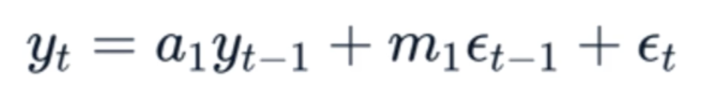

<h3>4. ARIMA(p, d, q) - AutoRegressive Integrated Moving Average</h3>
A similar operation to the above takes place after the difference operation. ARMA was the brother of SES, it was good in trendy and non-seasonal models. ARIMA and SARIMA are more successful models on trend and against seasonality. <ins>Therefore, we do not even need to look at ARMA in practice because ARIMA can do what ARMA does.</ins>
* The prediction is made by a linear combination of differenced observations and errors from previous time steps.
* It is suitable for univariate data with a trend but no seasonality. (So it is the brother of DES.)

**Why is there an integration process?:** In time series, there was an assumption that forecasting performance degrades when the series is not stationary. A non-stationary series is more unpredictable. Therefore, if we have a series and it is not stationary, then it is necessary to make this series stationary for some statistical methods to be used. We assume that we can make more successful predictions when we make a series stationary. Therefore, the ARIMA method automatically performs the difference between the methods we will use and makes the series stationary.
* The I statement in ARIMA means integrated and indicates how many differences will be received.
* p (autoregressive degree) => the number of past true value delays. If p=2, yt-1 and yt-2 are in the model (i.e. added as a variable).
* d (degree of difference) => stands for difference. (Denotes how many differences we want to take to stabilize.)
* q (moving average degree) => represents how many delay expressions to get in residuals (error delay number). If q=2, et-1 and et-2 are in the model.
* We'll try to get the best of all three by trial and error.

<h3>5. SARIMA(p, d, q)(P, D, Q)m - Seasonal AutoRegressive Integrated Moving Average(Mevsimsel Otoregresif Integrated MA)</h3>
SARIMA = ARIMA + Seasonality
* (p, d, q) parameters from ARIMA, so they are trend elements (because ARIMA is able to model the trend)
* (P, D, Q) parameters of SARIMA, so they are seasonal elements. 
* m is seasonality parameter, the number of time steps for a single seasonal period. Expresses the structure of seasonality. This seasonality cycle refers to whether it is once a week, once a month, or every 12 months etc. The seasonality period is observable when we visualize the graph.
It can be used in univariate series with trend and/or seasonality. It is the most advanced method compared to other methods we have seen.


<center><h3>SUMMARY</h3></center>

* **Stationary** => SES, AR, MA, ARMA

* **Trend** => DES, ARIMA, SARIMA

* **Trend + Seasonality** => TES, SARIMA
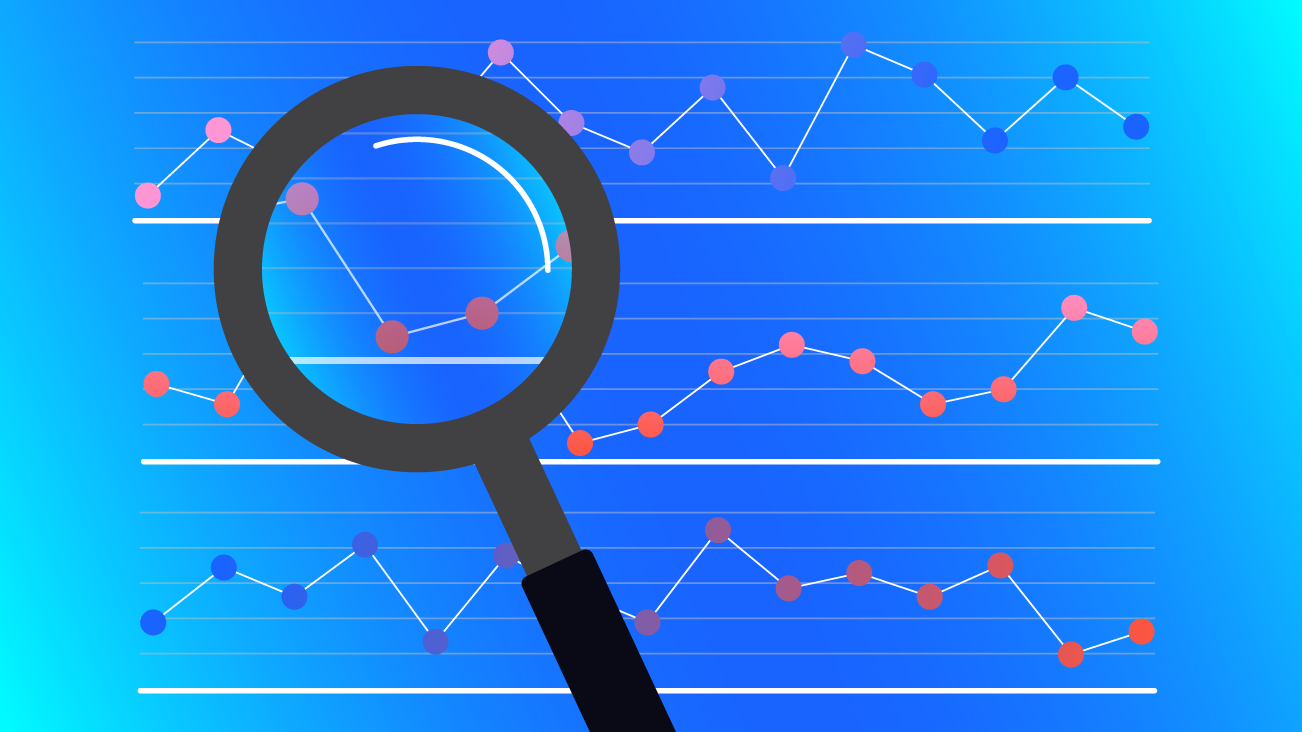

Let's implement these methods on a dataset.

## Story of Dataset and EDA

A dataset from the sm module will be used. It shows the atmospheric C02 in Hawaii according to time.

* Name: Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.
* Period of Record: March 1958 - December 2001

In [1]:
# Import Libraries
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

In [2]:
data = sm.datasets.co2.load_pandas()  # A dataset from the sm module
y = data.data  # target varible

In [3]:
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


The dates are given in index and CO2's are given according to dates. <ins>BY LOOKING AT THE DATES, WE CAN SAY THAT THIS DATASET IS WEEKLY!<br>
WHEN LOOKING AT CO2, WE SHOULD CONVERT IT FROM WEEKLY TO MONTHLY BEFORE IT MORE SIGNIFICANT TO LOOK AT THE MONTHLY!</ins>

In [4]:
# MS => month
y = y['co2'].resample('MS').mean()

In [5]:
y.isnull().sum()

5

There are missing values. Missing values in time series are mean, median cannot be filled. It can be filled with values before or after it. It can also be filled by averaging the values before and after it. Since the data is the only variable and we are looking at it as a before and after, it can be filled in such a way that the average of the previous and next value is used instead of averaging the entire data set. Because if there is a trend or seasonality in the series, it is clear that the assignment here may be wrong.

In [6]:
# fill a missing values with the next value
y = y.fillna(y.bfill())

In [7]:
y.isnull().sum()

0

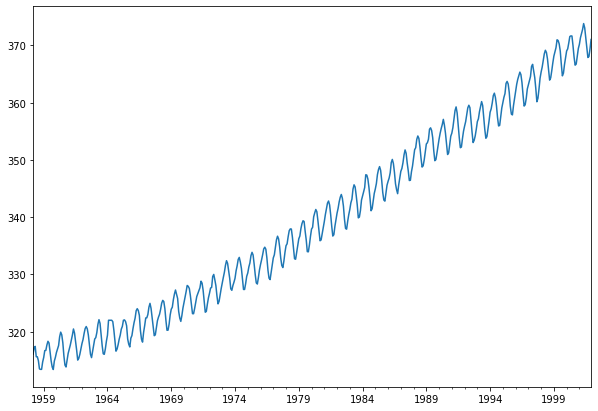

In [8]:
# visualize the series and look at its general structure
y.plot(figsize=(10, 7))
plt.show()

There is a trend in the series, it is not stationary because its statistical properties change with time, there is also seasonality.

We will move on to the modeling process, but **ATTENTION:**

In classical statistical methods, instead of model validation methods such as train-test separation and CV method, the model is built on all data, the success of the model is tested on all data, and the necessary internal or external parameters are found with efforts to be made on all data.

## Hold-out
Hold-out method is used because models tend to memorize and overfit, whether they are time series or deep learning methods when training models. Therefore, we should use some methods to prevent this and to evaluate the errors more accurately and to validate the models. That's why we split the dataset as train-test.

In [9]:
# let the train set be the part from 1958 to the end of 1997
train = y[:'1997-12-01']
print("Lenght of train", len(train))  # 478 months

# test set from the first month of 1998 to the end of 2001.
test = y['1998-01-01':]
print("Lenght of test", len(test))  # 48 months

Lenght of train 478
Lenght of test 48


**QUESTION:** We were using CV methods in ML methods, isn't CV more efficient?

* **ANSWER:** The data we have is time series data. When we break it into pieces and test it, trends break, seasonality scatter. Therefore, this process will not be healthy. This process can be done, but time periods should be considered.

# ARIMA(p, d, q) - (Autoregressive Integrated Moving Average)

We can use it in series with trend, but not the series with the seasonality.

In [10]:
# build ARIMA model
# order(p, d, q), 
arima_model = ARIMA(train, order=(1, 1, 1)).fit()

In [11]:
arima_model.summary() # statistical output of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  478
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -575.768
Date:                Thu, 01 Sep 2022   AIC                           1157.537
Time:                        21:59:10   BIC                           1170.039
Sample:                    03-01-1958   HQIC                          1162.452
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5669      0.054     10.586      0.000       0.462       0.672
ma.L1          0.3284      0.062      5.306      0.000       0.207       0.450
sigma2         0.6534      0.050     12.965      0.000       0.555       0.752
===================================================================================
Ljung-Box (L1) (Q):                   2.26   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.13   Prob(JB):                         0.14
Heteroskedasticity (H):               0.98   Skew:                             0.09
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* Model => shows the degrees of the model 
* AIC, BIC, HQIC => Akaike information criteria, the lower the better

**ATTENTION:** We are not interested in statistics, our main objective is to try the models and choosing the best model and estimate.

In [12]:
# prediction
# predict after 48 periods (test set 48 units)
y_pred = arima_model.forecast(48)[0] # 0. index is the expressions we expect, we choose that index

## Function for Visualization

Since we will use the visualization often later, let's make both the graph and the MAE functional.

In [13]:
def plot_co2(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    train["1985":].plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(6, 4))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()

Our prediction visualization function expects Pandas series and df from us, so we convert it to pandas series.

In [14]:
y_pred = pd.Series(y_pred, index=test.index)

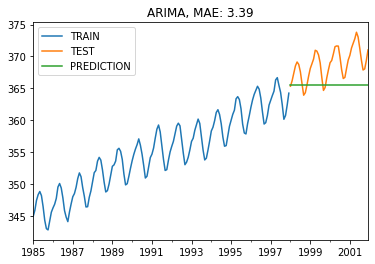

In [15]:
plot_co2(train, test, y_pred, "ARIMA")

## Hyperparameter Optimization (Determining Model Degree)

It is referred to as model degree in statistical sources and as hyperparameter in ML sources.
There are 2 common methods:

1. Looking at AIC&BIC Statistics
2. Determining the model grade according to the ACF&PACF graphs

There are points where ACF&PACF graphs are insufficient, at these points, AIC&BIC test statistics are used. So we will look at AIC&BIC.

## Determining Model Grade Based on AIC & BIC Statistics
AIC & BIC = Akaike Information Criteria, the lower the better

In [16]:
p = d = q = range(0, 6) # values can be given smaller to faster process
pdq = list(itertools.product(p, d, q)) # brings together all possible combinations

In [17]:
pdq[0:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3)]

In some cases, errors occur in ARIMA models, we use try-except because we want to ignore these errors and continue the loop. Our purpose is to say "don't stop working, continue" to the function.

In [18]:
# report can be set as False to avoid output crowd
def arima_optimizer_aic(train, orders, report=False):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arima_model_result = ARIMA(train, order=order).fit()
            aic = arima_model_result.aic  # gets the AIC statistic on the model
            if aic < best_aic:
                best_aic, best_params = aic, order
                if report:
                    print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params  # only return the parameter, not the statistic

In [19]:
best_params_aic = arima_optimizer_aic(train, pdq, report=True)

ARIMA(0, 0, 0) AIC=3954.01
ARIMA(0, 0, 1) AIC=3312.73
ARIMA(0, 0, 2) AIC=2771.31
ARIMA(0, 0, 3) AIC=2328.74
ARIMA(0, 0, 4) AIC=2020.69
ARIMA(0, 0, 5) AIC=1757.57
ARIMA(0, 1, 0) AIC=1523.91
ARIMA(0, 1, 1) AIC=1254.79
ARIMA(0, 1, 2) AIC=1137.97
ARIMA(0, 1, 3) AIC=1094.51
ARIMA(0, 1, 5) AIC=1052.23
ARIMA(1, 1, 5) AIC=1029.14
ARIMA(2, 1, 1) AIC=979.80
ARIMA(2, 1, 2) AIC=979.50
ARIMA(2, 1, 3) AIC=844.86
ARIMA(2, 1, 4) AIC=832.14
ARIMA(2, 1, 5) AIC=795.43
ARIMA(3, 1, 5) AIC=794.57
ARIMA(4, 1, 4) AIC=487.92
Best ARIMA(4, 1, 4) AIC=487.92


So, our best p, d, q values are 4, 1, 4. Now, create a final model with these values.

## Final Model for ARIMA

In [20]:
# final model
arima_model = ARIMA(train, order=best_params_aic).fit()

In [21]:
# prediction
y_pred = arima_model.forecast(48)[0]

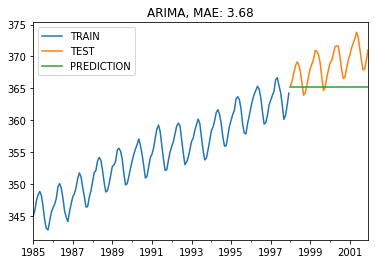

In [22]:
y_pred = pd.Series(y_pred, index=test.index)

plot_co2(train, test, y_pred, "ARIMA")

# SARIMA(p, d, q)(P, D, Q) - (Seasonal Autoregressive Integrated Moving-Average)

We will have 6 values as those who will come from ARIMA(p, d, q) and those who will be found in SARIMA(P, D, Q) itself. So we have to get combinations of these.

Since there are many arguments, we make the model and the fit separately.
* order => trend components from ARIMA(p, d, q) 
* seasonal_order => seasonal components from SARIMA(P, D, Q)

In [23]:
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12))

In [24]:
# disp=0 to avoid output crowd
sarima_model = model.fit(disp=0)  # fit the model

We used .forecast() before for predicted values, here we use get_forecast()

In [25]:
# predict
# steps=size of test data
y_pred_test = sarima_model.get_forecast(steps=48)

In [26]:
# to get the predicted y values
y_pred = y_pred_test.predicted_mean

In [27]:
# for the visualization function we need to convert it to pd series or df
y_pred = pd.Series(y_pred, index=test.index)

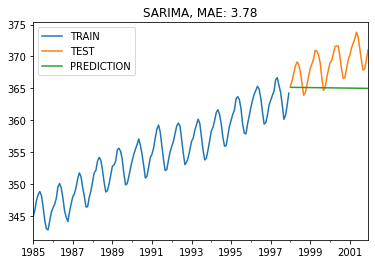

In [28]:
plot_co2(train, test, y_pred, "SARIMA")

As it can be seen, even hyperparameter optimization has not implemented, MAE of SARIMA became close to MAE of ARIMA.

## Hyperparameter Optimization (Determining Model Degree)

* p, d, q => ARIMA Parameters. Wider range can be entered, but here, narrow range is given to complete process in the short time. 
* seasonal_pdq => SARIMA Parameters(P, D, Q, s) => Seasonality expression(12) is added next to all possible combinations. Since we know that a cycle is completed once in 12 months, we write 12 directly.

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 

## Determining Model Grade Based on AIC Statistics

In [30]:
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

In [31]:
best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6922.606550808509
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6318.305219679214
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1643.9996657880379
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1428.2938925348508
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1820.7236583825966
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1653.729484027914
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1205.025400971046
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:973.207727675453
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6269.190364756832
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5663.567928540047
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1229.8447516025176
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1126.5843176793833
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1473.0898881947135
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1414.49020595465
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1008.160268516428
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:767.6332844686492
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1523.9134546907358
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1154.

In [32]:
print("p, d, q:", best_order)
print("P, D, Q, s:", best_seasonal_order)

p, d, q: (1, 1, 1)
P, D, Q, s: (0, 1, 1, 12)


## Final Model for SARIMA

In [33]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

y_pred_test = sarima_final_model.get_forecast(steps=48)

y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

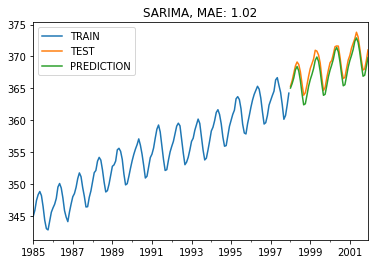

In [34]:
plot_co2(train, test, y_pred, "SARIMA")

MAE decreases dramatically after hyperparameter tuning to SARIMA, eventhough narrow range has been given to p, d, q, P, D, Q. 

# BONUS: SARIMA Optimization by MAE

AIC result was considered above. The same process can be done with looking MAE values. A function will be written like above with a slight change. 

In [35]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [36]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=48)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)
                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

In [37]:
best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:368.7634375
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:324.1790915674009
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:5.063020833333329
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:4.803324375695845
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:5.073953469325261
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:4.884899737303045
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:3.3237251359415474
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:1.527970617601093
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:364.91786914276616
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:320.4050599429142
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:4.9853396661013285
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:4.765305162672184
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:4.940878664481609
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:4.6944378494131875
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:3.674155320923782
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:1.5667083730681135
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:4.526979166666664
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:3.931540144

In [38]:
print("p, d, q:", best_order)
print("P, D, Q, s:", best_seasonal_order)

p, d, q: (0, 1, 0)
P, D, Q, s: (1, 1, 0, 12)


## Final Model for SARIMA with MAE

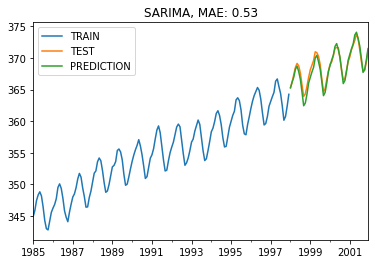

In [39]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

y_pred_test = sarima_final_model.get_forecast(steps=48)
y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

plot_co2(train, test, y_pred, "SARIMA")

We got the lowest MAE, therefore, it can be said that the best values have been found. 

# Final Model
Now that I know my best parameters, I can apply this to all the data and build the final model and estimate the data I don't have. **WE MADE THE TRAIN-TEST SPLIT FOR MODEL VALIDATION AND HYPERPARAMETER OPTIMIZATION, SO WHEN THE PROCESSES ARE COMPLETE, WE MUST FIT ALL DATA AGAIN!**

In [40]:
# y => the whole dataset, it has been splitted to train-test at the beginning
model = SARIMAX(y, order=best_order, seasonal_order=best_seasonal_order) # tuned_model
sarima_final_model = model.fit(disp=0)

The model is ready to predict. Now, if we want to make a prediction about the next month that we don't have:

In [41]:
feature_predict = sarima_final_model.get_forecast(steps=1)  # 1 month later
feature_predict = feature_predict.predicted_mean # to get the result from the object
feature_predict

2002-01-01    371.93053
Freq: MS, dtype: float64

We made a prediction about the first month of 2002, which I do not have.

**ATTENTION:** We did not have data for the 1st month of 2002, this has not happened yet!

In [42]:
("WE DID NOT HAVE DATA FOR THE 1st MONTH OF 2002, THIS HAS NOT HAPPENED YET").lower()

'we did not have data for the 1st month of 2002, this has not happened yet'

In [43]:
# If we want to obtain the 6-month forecast results
feature_predict = sarima_final_model.get_forecast(steps=6)  
feature_predict = feature_predict.predicted_mean
feature_predict

2002-01-01    371.930530
2002-02-01    372.718072
2002-03-01    373.585289
2002-04-01    374.494056
2002-05-01    375.101888
2002-06-01    374.687872
Freq: MS, Name: predicted_mean, dtype: float64